In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
from fastai import *
from fastai.vision import *

In [9]:
#moved a few dirs to train (from data)
path = Path('/home/jupyter/mushrooms/')

In [12]:
np.random.seed(42)

data = ImageDataBunch.from_csv(path, train="data", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [16]:
# data.show_batch()

In [14]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [15]:
learn.fit_one_cycle(4)

Total time: 00:26
epoch  train_loss  valid_loss  error_rate
1      1.547802    0.892766    0.500000    (00:07)
2      1.158226    0.415808    0.166667    (00:05)
3      0.864289    0.399883    0.138889    (00:06)
4      0.683017    0.361199    0.111111    (00:06)



In [22]:
data.classes

['champignon', 'oesterzwam', 'gewoon eekhoorntjesbrood']

In [21]:
learn.save('3_resnet34_defaults')

In [18]:
interpr = ClassificationInterpretation.from_learner(learn)

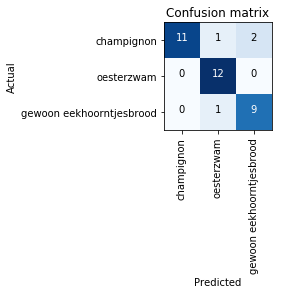

In [19]:
interpr.plot_confusion_matrix()

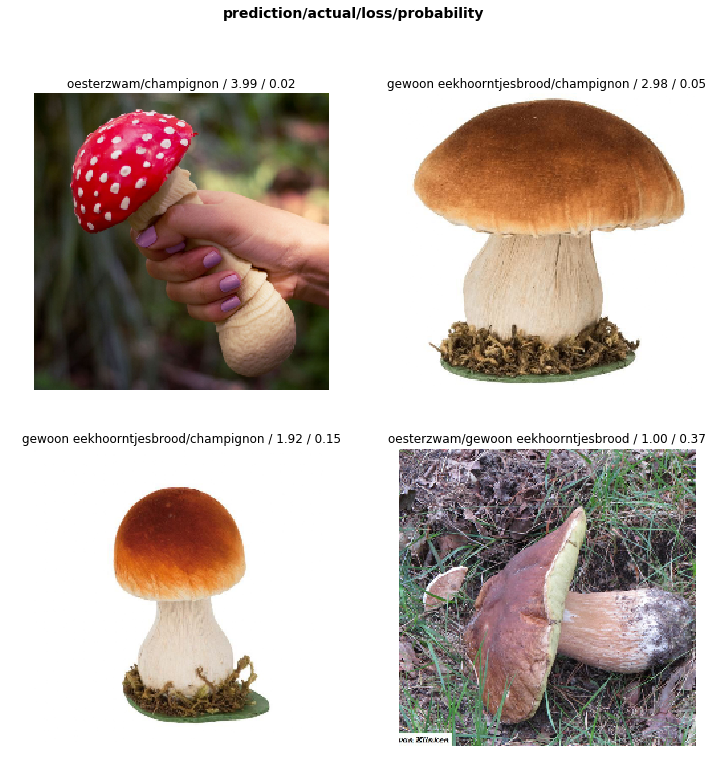

In [20]:
interpr.plot_top_losses(4)